# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home. 

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart wayys to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

## Setup

In [11]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [12]:
# TODO: Load the dataset for training
output_data = pd.read_json('Data/output.json')
output_data.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [13]:
# TODO: Load the dataset for testing
output_test_data = pd.read_json('Data/output_test.json')
output_test_data.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [14]:
# print out the number of unique users and also randomly select one user
# TODO
number_of_uniques = output_data['user_id'].nunique()

random_user = output_data['user_id'].sample().iloc[0]
print(f'(Number of unique users: {number_of_uniques}, random user id: {random_user})')

(Number of unique users: 60, random user id: 50)


In [15]:
from keplergl import KeplerGl

# Uncomment the following line if you are using Google Colab
# from google.colab import output
# output.enable_custom_widget_manager()

In [16]:
# choose the data related to the randomly selected user
# show destinations of this user on map
# You should Use Kepler.gl to visualize the data
random_user_data = output_data[output_data['user_id'] == random_user]

# TODO
map_config = {
    'version': 'v1',
    'config': {
        'mapState': {
            'latitude': random_user_data['dest lat'].mean(),
            'longitude': random_user_data['dest lon'].mean(),
            'zoom': 10
        }
    }
}

random_user_map = KeplerGl(height=600, data={"data": random_user_data}, config=map_config)
random_user_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 35.869528985507245, 'longitude': 51.1081…

In [25]:
# Sample output:

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [17]:
# TODO
X_train = output_data[['user_id','Day', 'origin lat','origin lon', 'start_time']]
y_train = output_data[['dest lat', 'dest lon']]
X_test = output_test_data[['user_id','Day', 'origin lat','origin lon', 'start_time']]
y_test = output_test_data[['dest lat', 'dest lon']]

In [18]:
# print out the shape of the train and test dataframes
# TODO
print(f'(({X_train.shape}, {y_train.shape}), ({X_test.shape}, {y_test.shape}))')

(((17994, 5), (17994, 2)), ((4499, 5), (4499, 2)))


## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [97]:
# Define the model
# TODO: You can change the signature of functions and also add any function you need
from scipy.stats import mode

class NearestNeighbor():
    def __init__(self, K):
        self.K = K
        self.train_X = None
        self.train_y = None
        
    def _preprocess(self, data):
        data = data.to_numpy()
        data[:, 4] = np.double(data[:, 4].astype('datetime64[h]').astype(int) // 5)
        data[:, 2] = np.double(data[:, 2] / 5)
        data = np.array(data, dtype=np.float64)
        return data

    def fit(self, train_X, train_y):
        self.train_X = self._preprocess(train_X)
        self.train_y = train_y.to_numpy()

    def predict(self, data):
        data = self._preprocess(data)
        prediction = np.zeros((len(data), 2))
        for i in range(len(data)):
            nearest = self.nearest_points(data[i])
            predict = mode(nearest, axis=0, keepdims=True).mode.flatten()
            prediction[i] = predict
        return prediction

    def nearest_points(self, data):
        difference = self.train_X - data
        difference[:, 0] = np.where(difference[:, 0] != 0, 0.75, difference[:, 0])
        squared_difference = np.sum(difference ** 2, axis=1)
        least_difference = squared_difference.argsort()
        nearest = self.train_y[least_difference][:self.K]
        return nearest

In [98]:
# Fit the model on training data
# TODO
knn_model = NearestNeighbor(3)
knn_model.fit(X_train, y_train)

In [53]:
def calculate_accuracy(actual, predicted):
    actual = actual.to_numpy() if isinstance(actual, pd.DataFrame) else actual
    predicted = predicted.to_numpy() if isinstance(predicted, pd.DataFrame) else predicted
    
    matched = np.sum((actual == predicted).all(axis=1))
    total = len(actual)
    
    return matched / total

In [100]:
# Calculate the accuracy on training data
# TODO
train_predictions = knn_model.predict(X_train)
train_accuracy = calculate_accuracy(y_train, train_predictions)
train_accuracy

0.6224296987884851

In [101]:
# Calculate the accuracy on test data
# TODO
test_predictions = knn_model.predict(X_test)
test_accuracy = calculate_accuracy(y_test, test_predictions)
test_accuracy

0.5385641253611914

**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: It is a simple and intuitive approach that is also adaptable to changes. because we can easily change the training data and once again run the k-nearest algorithm.

But as the model gets more and more complicated, I don't think it is a good decision to choose this algorithm. Because it has a high cost of computation and also it is really sensitive to noisy data. So other models are better to use

# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [102]:
%pip install xgboost

     -------------------------------------- 99.8/99.8 MB 601.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
import xgboost as xgb

# Defining the model
# TODO: You can change the signature of functions and also add any function you need
class Encoder:
    def __init__(self, classifier):
        self.classifier = classifier
        self.mapping = {}
        self.inverse = {}
        self.train_X = None
        self.train_y = None
        self.count = 0
        
    def preprocess(self, x):
        x = x.to_numpy()
        x[:, 4] = np.vectorize(lambda t: np.double(t.hour))(x[:, 4])
        x = x.astype(np.float64)
        return x
    
    
    def labeling(self, y):
        y = y.to_numpy()
        for i in range(len(y)):
            key = tuple(y[i, :2])
            if key not in self.mapping:
                self.mapping[key] = self.count
                self.inverse[self.count] = y[i]
                self.count += 1
        y = self.transform(y)
        return y
    
        
    def predict(self, data):
        data = self.preprocess(data)
        prediction = self.classifier.predict(data)
        return self.inverse_transform(prediction)

    def fit(self, x, y):
        self.train_X = self.preprocess(x)
        self.train_y = self.labeling(y)
        self.classifier.fit(self.train_X, self.train_y)

    def transform(self, y):
        return np.array([self.mapping[tuple(item[:2])] for item in y])

    def inverse_transform(self, encoder):
        return np.array([self.inverse[code] for code in encoder])


In [48]:
# TODO: fit the Encoder on training data

In [60]:
# TODO: transform the training and test data
# and fit the model on training data
classifier = xgb.XGBClassifier(objective='multi:softmax')
encoder = Encoder(classifier)
encoder.fit(X_train, y_train)

In [61]:
# TODO: print out train-data accuracy
predicted = encoder.predict(X_train)
train_accuracy = calculate_accuracy(y_train, predicted)
train_accuracy

0.8008224963876848

In [62]:
# TODO: print out test-data accuracy
predicted = encoder.predict(X_test)
test_accuracy = calculate_accuracy(y_test, predicted)
test_accuracy

0.6717048232940653

**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: I think XGBoost is a powerful tool with high performance and efficiency. But it is also so complex that is not easy to interpret. So I think for this problem and when the model get more and more complicated, it is a good choice with compare to KNN algorithm. 

But we should note that this model is not appropriate for small datasets and simple models.

**Question**: Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

Your Answer: when there is a noise in training data, XGBoost leads ot overfitting

Possible ways to solve this matter are hyper-parameter tuning, feature engineering, early stopping, ...

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [64]:
# load the training dataset
# TODO
trip_data = pd.read_json('Data/trip_data.json')
trip_data.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [65]:
# load the test dataset
# TODO
trip_test_data = pd.read_json('Data/trip_data_test.json')
trip_test_data.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [69]:
# Extract features and do preprocessing if needed
# TODO

origin_df = pd.DataFrame((pd.DataFrame(trip_data['origin'].tolist(), columns=['origin', 'ol']))['ol'].tolist(), columns=['Origin Lat', 'Origin Long'])
origin_df = origin_df.merge(pd.DataFrame(trip_data['origin'].tolist(), columns=['origin', 'ol'])[['origin']], left_index=True, right_index=True)

destination_df = origin_df.merge(pd.DataFrame(trip_data['destination'].tolist(), columns=['destination', 'ol'])[['destination']], left_index=True, right_index=True)
destination_df = destination_df.merge(pd.DataFrame((pd.DataFrame(trip_data['destination'].tolist(), columns=['destination', 'ol']))['ol'].tolist(), columns=['Dest Lat', 'Dest Long']), left_index=True, right_index=True)

final_df = destination_df.merge(trip_data[['user_id', 'Day', 'start_time', 'end_time', 'price']], left_index=True, right_index=True)

train_df = final_df[['user_id', 'Day', 'origin', 'destination', 'start_time', 'end_time', 'price', 'Origin Lat', 'Origin Long', 'Dest Lat', 'Dest Long']]
train_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long
0,0,0,work,restaurant,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99,35.625,51.375,36.000,51.085
1,0,0,restaurant,work,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66,36.000,51.085,35.625,51.375
2,0,0,home,restaurant,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08,35.680,51.445,35.745,51.465
3,0,0,restaurant,home,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00,35.745,51.465,35.680,51.445
4,0,1,work,home,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48,35.625,51.375,35.680,51.445


In [70]:
# Extract features and do preprocessing if needed
# TODO
origin_df = pd.DataFrame((pd.DataFrame(trip_test_data['origin'].tolist(), columns=['origin', 'ol']))['ol'].tolist(), columns=['Origin Lat', 'Origin Long'])
origin_df = origin_df.merge(pd.DataFrame(trip_test_data['origin'].tolist(), columns=['origin', 'ol'])[['origin']], left_index=True, right_index=True)

destination_df = origin_df.merge(pd.DataFrame(trip_test_data['destination'].tolist(), columns=['destination', 'ol'])[['destination']], left_index=True, right_index=True)
destination_df = destination_df.merge(pd.DataFrame((pd.DataFrame(trip_test_data['destination'].tolist(), columns=['destination', 'ol']))['ol'].tolist(), columns=['Dest Lat', 'Dest Long']), left_index=True, right_index=True)

final_df = destination_df.merge(trip_test_data[['user_id', 'Day', 'start_time', 'end_time', 'price']], left_index=True, right_index=True)

test_df = final_df[['user_id', 'Day', 'origin', 'destination', 'start_time', 'end_time', 'price', 'Origin Lat', 'Origin Long', 'Dest Lat', 'Dest Long']]
test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long
0,24,6,pool,home,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00,35.650,51.225,35.640,51.270
1,46,2,university,restaurant,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84,35.625,51.250,35.690,51.295
2,27,5,pool,restaurant,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36,35.650,51.225,35.865,51.045
3,7,4,work,home,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74,35.875,51.375,35.890,51.315
4,27,3,work,restaurant,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08,35.625,51.375,35.650,51.385


In [73]:
# print out the unique values for each column
# TODO
for i in range(len(test_df.columns)):
    print(f'Column: {test_df.columns[i]}')
    print('Unique values:')
    print(test_df[test_df.columns[i]].unique())
    print('===================================')
    print()

Column: user_id
Unique values:
[24 46 27  7 41 58 55  4 29  1 50 11 40 18 28 42 25  0 34 51 38 19 21 33
 26 14 17  6 54 36 43 22 45 31 48 23  8 49 52 30 57  2 39 32  9  5 35 47
  3 59 53 37 20 13 56 10 12 16 15 44]

Column: Day
Unique values:
[6 2 5 4 3 0 1]

Column: origin
Unique values:
['pool' 'university' 'work' 'restaurant' 'home' 'park' 'gym']

Column: destination
Unique values:
['home' 'restaurant' 'work' 'university' 'pool' 'park' 'gym']

Column: start_time
Unique values:
['2024-01-30T11:58:00.000000000' '2024-01-30T21:58:00.000000000'
 '2024-01-30T20:05:00.000000000' '2024-01-30T17:39:00.000000000'
 '2024-01-30T13:16:00.000000000' '2024-01-30T13:44:00.000000000'
 '2024-01-30T21:17:00.000000000' '2024-01-30T23:34:00.000000000'
 '2024-01-30T07:21:00.000000000' '2024-01-30T08:22:00.000000000'
 '2024-01-30T17:44:00.000000000' '2024-01-30T12:15:00.000000000'
 '2024-01-30T13:51:00.000000000' '2024-01-30T16:16:00.000000000'
 '2024-01-30T17:51:00.000000000' '2024-01-30T14:31:00.000000

In [78]:
import pandas as pd

# print out the data type of each column
# TODO
print('DataFrame Column Head and Data Type:')
print('========================================')
for i in range(len(test_df.dtypes)):
    print(f'Column: {test_df.columns[i]}')
    print(f'Data Type: {test_df.dtypes[i]}')
    print('----------------------------------------')

DataFrame Column Head and Data Type:
Column: user_id
Data Type: int64
----------------------------------------
Column: Day
Data Type: int64
----------------------------------------
Column: origin
Data Type: object
----------------------------------------
Column: destination
Data Type: object
----------------------------------------
Column: start_time
Data Type: datetime64[ns]
----------------------------------------
Column: end_time
Data Type: datetime64[ns]
----------------------------------------
Column: price
Data Type: float64
----------------------------------------
Column: Origin Lat
Data Type: float64
----------------------------------------
Column: Origin Long
Data Type: float64
----------------------------------------
Column: Dest Lat
Data Type: float64
----------------------------------------
Column: Dest Long
Data Type: float64
----------------------------------------


Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Finalize the data (do all preprocessing needed)
# TODO

Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# TODO
train_dataset = ...
val_dataset = ...
test_dataset = ...

# Batch size
batch_size = ...

# DataLoader
train_loader = ...
val_loader = ...
test_loader = ...

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [40]:
# Implement the train_model function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    # TODO
    # training loop

    # TODO
    # Plot training and validation losses
    training_losses = []
    validation_losses = []
    for epoch in range(epochs):
        [optimizer.step(model(x), criterion(model(x), y[:, 0].long()).backward()) for x, y in train_loader]
        training_losses.append(float(loss))
        val_features, val_labels = next(iter(val_loader))
        val_predictions = model(val_features)
        val_loss = criterion(val_predictions, val_labels[:, 0].long())
        validation_losses.append(float(val_loss))
        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss}, Val Loss: {val_loss}')

    return training_losses, validation_losses


# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(128, 128)
        self.activation2 = nn.ReLU()
        self.output_layer = nn.Linear(32, output_dim)
        self.output_activation = nn.Softmax(dim=1)  
        self.double()

        
    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.output_activation(self.output_layer(x))
        return x


# TODO
# Define Model, Loss, Optimizer

input_dimension = 12
output_dimension = int(np.max(train_results_np[:, 0]) + 1)
model = MLP(input_dimension, output_dimension)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

Epoch 1/100, Train Loss: 1.0487864697296945, Val Loss: 0.825067044099172
Epoch 2/100, Train Loss: 0.7228209497131539, Val Loss: 0.6336556743250953
Epoch 3/100, Train Loss: 0.5818655832103018, Val Loss: 0.5212380468845368
Epoch 4/100, Train Loss: 0.5003959857500516, Val Loss: 0.46343481361865996
Epoch 5/100, Train Loss: 0.44421267915054186, Val Loss: 0.40669909245438046
Epoch 6/100, Train Loss: 0.4039607332832009, Val Loss: 0.381109829015202
Epoch 7/100, Train Loss: 0.37692798841634445, Val Loss: 0.36106356458531486
Epoch 8/100, Train Loss: 0.35933424999728003, Val Loss: 0.34938460025522444
Epoch 9/100, Train Loss: 0.3425597203509695, Val Loss: 0.32436489780743916
Epoch 10/100, Train Loss: 0.33038727337351215, Val Loss: 0.3303435792525609
Epoch 11/100, Train Loss: 0.3223871627502893, Val Loss: 0.3184198438458973
Epoch 12/100, Train Loss: 0.3125809596179152, Val Loss: 0.3133219716946284
Epoch 13/100, Train Loss: 0.3075930454145522, Val Loss: 0.3141320741507742
Epoch 14/100, Train Loss: 0

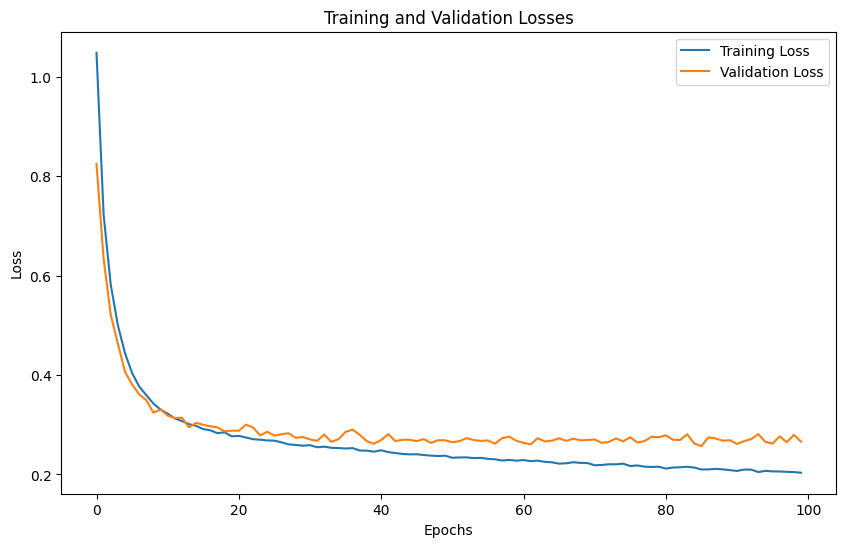

In [41]:
train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

In [ ]:
plt.plot(train_loss, color= 'green')
plt.plot(val_loss, color= 'red')

## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [ ]:
def torch_accuracy(predictions, targets):
    correct_predictions = torch.sum(predictions == targets)
    return correct_predictions / len(targets)


In [42]:
test_features, test_labels = next(iter(test_loader))
model_predictions = model(test_features)
accuracy = torch_accuracy(torch.argmax(model_predictions, dim=1), test_labels[:, 0].long())
print(f"Accuracy: {accuracy.item()}")
# report model accuracy on test data
model.eval()
# TODO

Accuracy: 0.8993109579906646


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [43]:
import random
# TODO: choose a random sample from test data and print it out

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Long,Dest Lat,Dest Long
3850,13,-0.355805,4,6,0.086474,0.273943,1.75831,1.744438,-1.29894,35.625,51.375


In [44]:
# TODO: predict the destination of the above sample
# print out the prediction

Predicted: 6


In [45]:
# TODO: print out the actual destination of the above sample

Actual: 6


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [46]:
# TODO: use inverse_transform to print out the actual name of destination of the above sample

Name of predicted destination: work


**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: ...

# How to Submit:

Please upload your notebook (`.ipynb`) compressed (as a `.zip` file) or uncompressed on Quera. **Note** that for each part, the accuracy of your model on the given test dataset is important. So, your accuracy should be **at least** same as ours (or better). Also, we will check your code after the submission. So, please make sure that there are no **data snooping** or **data leakage** in your code. You **can not** use the test data in any stages for your model, except for the final evaluation part! So, please be ware of that, or you may lose points.

Your project is graded via 2 main parts: 
1. Checking out your implementation (to check if there are no "data snooping" and "data leakage") 
   
2. Checking accuracies of your models on the test set. 

3. Running again your code by you in the "in-person" session and hearing your explanations (on the parts that we asked questions about the models, overfitting and etc. with tag "QUESTION" in the notebook).